## Basic supervised learning on MP

In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Materials project

In [2]:
MATERIALS_PROJECT_PKL = os.path.join("mp", "materials_project.pkl")
mpdf = pd.read_pickle(MATERIALS_PROJECT_PKL)
mpdf

,material_id,anonymous_formula,band_gap,band_structure,bandstructure_uniform,blessed_tasks,bond_valence,chemsys,cif,created_at,...,ordering,is_magnetic,exchange_symmetry,num_unique_magnetic_sites,types_of_magnetic_species,magmoms,total_magnetization_normalized_vol,total_magnetization_normalized_formula_units,num_magnetic_sites,true_total_magnetization
0,mp-862690,{'A': 1.0},0.0000,None,None,"{'GGA NSCF Uniform': 'mp-1004086', 'GGA Static...",None,Ac,# generated using pymatgen\ndata_Ac\n_symmetry...,2014-08-23 01:06:11,...,NM,False,194,0,[],"[0, 0, 0, 0]",1.611105e-04,0.007333,0,0.029332
1,mp-1183057,{'A': 1.0},0.0000,None,None,{'GGA Static': 'mp-1404739'},None,Ac,# generated using pymatgen\ndata_Ac\n_symmetry...,2019-01-11 11:43:11.515000,...,NM,False,152,0,[],"[0, 0, 0]",1.676193e-04,0.007600,0,0.022801
2,mp-1183069,{'A': 1.0},0.0000,None,None,{'GGA Static': 'mp-1504767'},None,Ac,# generated using pymatgen\ndata_Ac\n_symmetry...,2019-01-11 11:43:44.199000,...,NM,False,166,0,[],"[0, 0, 0]",9.131548e-04,0.041015,0,0.123046
3,mp-989737,{'A': 1.0},0.0000,None,None,{'GGA Static': 'mp-1415578'},None,Ag,# generated using pymatgen\ndata_Ag\n_symmetry...,2015-12-16 14:33:29,...,NM,False,166,0,[],"[0, 0, 0]",4.692753e-04,0.008471,0,0.025413
4,mp-8566,{'A': 1.0},0.0000,None,None,"{'GGA NSCF Uniform': 'mp-922443', 'GGA Static'...",None,Ag,# generated using pymatgen\ndata_Ag\n_symmetry...,2011-05-28 01:39:32,...,NM,False,194,0,[],"[0, 0, 0, 0]",7.053656e-08,0.000001,0,0.000005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126142,mp-1221189,"{'A': 1.0, 'B': 1.0, 'C': 2.0, 'D': 4.0, 'E': ...",0.1545,None,None,{'GGA+U Static': 'mp-1329905'},None,Ca-F-Mn-Na-O-Si-Ti-Zr,# generated using pymatgen\ndata_Na5Ca7Zr2TiMn...,2019-01-12 21:55:14.467000,...,FM,True,2,1,[Mn],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2.597991e-03,2.020300,1,2.020300
126143,mp-1224604,"{'A': 1.0, 'B': 2.0, 'C': 2.0, 'D': 3.0, 'E': ...",1.7608,None,None,{'GGA+U Static': 'mp-1327892'},None,Fe-K-Li-Mn-Na-O-Si-Ti,# generated using pymatgen\ndata_K2Na4Li2Ti4Mn...,2019-01-13 00:49:57.412000,...,FM,True,1,4,"[Mn, Fe]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.920918e-02,18.808137,4,18.808137
126144,mp-1223707,"{'A': 1.0, 'B': 1.0, 'C': 1.0, 'D': 1.0, 'E': ...",1.7772,None,None,{'GGA+U Static': 'mp-1331019'},None,Fe-K-Li-Mn-Na-O-Si-Ti,# generated using pymatgen\ndata_KNa2LiTi2MnFe...,2019-01-13 00:03:54.702000,...,FM,True,9,1,[Mn],"[-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0....",2.048653e-03,0.994359,2,1.988718
126145,mp-1213447,"{'A': 1.0, 'B': 1.0, 'C': 1.0, 'D': 1.0, 'E': ...",0.0000,None,None,{'GGA+U Static': 'mp-1364881'},None,Ba-Ca-F-Fe-K-Na-O-Si-Ti,# generated using pymatgen\ndata_KBaNaCaTi4Fe8...,2019-01-12 15:27:42.093000,...,FM,True,10,18,"[Fe, O]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.3, ...",4.757869e-02,38.000000,15,38.000000


## Load periodic table

In [3]:
PTBL_PKL = os.path.join("ptable", "ptable.pkl")
ptable = pd.read_pickle(PTBL_PKL)
ptable

,atomic_number,atomic_radius,atomic_volume,block,boiling_point,density,dipole_polarizability,electron_affinity,electronic_configuration,evaporation_heat,...,imat_electronegativity,imat_electron_binding_energy,imat_atomic_radius,imat_valence,imat_cohesive_energy,imat_ionization_energy,ase_magnetic_moment,pymg_atomic_radius,pymg_electronegativity,ionization_energy
symbol,,,,,,,,,,,,,,,,,,,,,
H,1,25.0,14.1,s,20.280,0.0708,4.50711,0.754195,1s,0.904,...,2.10,13.6,37.0,1.0,NaN,13.5984,1.0,0.25,2.20,13.598434
He,2,120.0,31.8,s,4.216,0.1470,1.38375,-19.700000,1s2,0.080,...,0.00,24.6,32.0,0.0,NaN,24.5873,0.0,NaN,NaN,24.587388
Li,3,145.0,13.1,s,1118.150,0.5340,164.11250,0.618049,[He] 2s,148.000,...,0.98,54.7,134.0,1.0,1.63,0.9800,1.0,1.45,0.98,5.391715
Be,4,105.0,5.0,s,3243.000,1.8480,37.74000,-2.400000,[He] 2s2,309.000,...,1.57,111.5,90.0,2.0,3.32,9.3227,0.0,1.05,1.57,9.322699
B,5,85.0,4.6,p,3931.000,2.3400,20.50000,0.279723,[He] 2s2 2p,504.500,...,2.04,188.0,82.0,3.0,5.81,8.2980,1.0,0.85,2.04,8.298019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Fl,114,NaN,NaN,p,NaN,NaN,31.00000,NaN,[Rn] 5f14 6d10 7s2 7p2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mc,115,NaN,NaN,p,NaN,NaN,71.00000,NaN,[Rn] 5f14 6d10 7s2 7p3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lv,116,NaN,NaN,p,NaN,NaN,NaN,NaN,[Rn] 5f14 6d10 7s2 7p4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Using a subset of materials

This project was developped following internships where a different version of materials project was used. Here we select only the materials that were in that version, in order to verify reproducibility.

In [4]:
SUBSET_MPIDS_CSV =  os.path.join("mp","subset_ids.csv")
subset_ids = pd.read_csv(SUBSET_MPIDS_CSV, names=["material_id"])
subset_mpdf = mpdf[mpdf["material_id"].isin(subset_ids["material_id"])]
subset_stable = subset_mpdf.loc[mpdf['e_above_hull'] <= 0.1]
subset_stable

,material_id,anonymous_formula,band_gap,band_structure,bandstructure_uniform,blessed_tasks,bond_valence,chemsys,cif,created_at,...,ordering,is_magnetic,exchange_symmetry,num_unique_magnetic_sites,types_of_magnetic_species,magmoms,total_magnetization_normalized_vol,total_magnetization_normalized_formula_units,num_magnetic_sites,true_total_magnetization
507,mp-10054,"{'A': 1.0, 'B': 1.0}",0.0000,None,None,"{'GGA NSCF Uniform': 'mp-992877', 'GGA Static'...",None,As-Zr,# generated using pymatgen\ndata_ZrAs\n_symmet...,2011-05-27 17:32:24,...,NM,False,225,0,[],"[0, 0]",0.000083,0.003400,0,0.003400
510,mp-1077063,"{'A': 1.0, 'B': 2.0}",0.0000,None,None,{'GGA Static': 'mp-1425278'},None,Bi-La,# generated using pymatgen\ndata_La2Bi\n_symme...,2018-04-07 21:31:03,...,NM,False,139,0,[],"[0, 0, 0, 0, 0, 0]",0.000137,0.014258,0,0.028517
511,mp-1080664,"{'A': 1.0, 'B': 1.0}",0.0000,None,None,{'GGA Static': 'mp-1415651'},None,B-Cr,# generated using pymatgen\ndata_CrB\n_symmetr...,2018-04-24 12:47:02,...,NM,False,141,0,[],"[0, 0, 0, 0, 0, 0, 0, 0]",0.000011,0.000190,0,0.000762
512,mp-1183051,"{'A': 1.0, 'B': 3.0}",0.0000,None,None,{'GGA Static': 'mp-1397364'},None,Ac-La,# generated using pymatgen\ndata_AcLa3\n_symme...,2019-01-11 11:42:55.004000,...,NM,False,194,0,[],"[0, 0, 0, 0, 0, 0, 0, 0]",0.000479,0.075782,0,0.151565
514,mp-1184226,"{'A': 1.0, 'B': 3.0}",0.0000,None,None,{'GGA Static': 'mp-1388686'},None,Ag-Ga,# generated using pymatgen\ndata_Ga3Ag\n_symme...,2019-01-11 12:37:47.065000,...,NM,False,225,0,[],"[0, 0, 0, 0]",0.000002,0.000142,0,0.000142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126131,mp-863289,"{'A': 1.0, 'B': 1.0, 'C': 3.0, 'D': 3.0, 'E': ...",3.1283,None,None,{'GGA+U Static': 'mp-1371592'},None,Al-B-F-Fe-H-Na-O-Si,# generated using pymatgen\ndata_NaAl6Fe3Si6B3...,2014-08-22 13:43:26,...,NM,False,160,0,[],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000006,0.003318,0,0.003318
126132,mp-1221055,"{'A': 1.0, 'B': 1.0, 'C': 2.0, 'D': 3.0, 'E': ...",2.4099,None,None,{'GGA+U Static': 'mp-1352918'},None,Al-B-H-Mg-Na-O-Si-V,# generated using pymatgen\ndata_NaMg2Al6VSi6B...,2019-01-12 21:48:23.983000,...,NM,False,8,0,[],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000004,0.002185,0,0.002185
126136,mp-707264,"{'A': 1.0, 'B': 1.0, 'C': 1.0, 'D': 1.0, 'E': ...",0.4881,None,None,{'GGA Static': 'mp-1331462'},None,C-Ca-F-H-Na-O-S-U,# generated using pymatgen\ndata_NaCa3UH16C3SO...,2013-12-22 06:19:07,...,FM,True,2,25,[O],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.005220,3.000000,4,6.000000
126142,mp-1221189,"{'A': 1.0, 'B': 1.0, 'C': 2.0, 'D': 4.0, 'E': ...",0.1545,None,None,{'GGA+U Static': 'mp-1329905'},None,Ca-F-Mn-Na-O-Si-Ti-Zr,# generated using pymatgen\ndata_Na5Ca7Zr2TiMn...,2019-01-12 21:55:14.467000,...,FM,True,2,1,[Mn],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.002598,2.020300,1,2.020300


## Functions to read chemical formulae

These functions were adapted from the `pymatgen` package

In [5]:
import collections
import re

def get_symbol_dict(f, factor):
    symbol_dict = collections.defaultdict(float)
    for regex in re.finditer(r"([A-Z][a-z]*)\s*([-*\.e\d]*)", f):
        element = regex.group(1)
        amount = 1
        if regex.group(2).strip() != "":
            amount = float(regex.group(2))
        symbol_dict[element] += amount * factor
        f = f.replace(regex.group(), "", 1)
    if f.strip():
        raise ValueError("{} is an invalid formula!".format(f))
    return symbol_dict


def parse_formula_recursive(formula):
    formula = formula.replace("@", "")  # for Metallofullerene like "Y3N@C80"
    regex = re.search(r"\(([^\(\)]+)\)\s*([\.e\d]*)", formula)
    if regex:
        factor = 1
        if regex.group(2) != "":
            factor = float(regex.group(2))
        unit_symbol_dict = get_symbol_dict(regex.group(1), factor)
        expanded_symbol = "".join([
            f"{element}{amount}" for element, amount in unit_symbol_dict.items()
        ])
        expanded_formula = formula.replace(regex.group(), expanded_symbol)
        return parse_formula_recursive(expanded_formula)
    return get_symbol_dict(formula, 1)


def parse_formula(formula):
    return dict(parse_formula_recursive(formula))

## Descriptors DataFrame

This should be done in a loop instead of one by one. Benjamin's work refers to Benjamin Groleau-Paré's internship results on random forest for the magnetization. Note that for this work, the descriptors are build droping nana

In [6]:
def prop_array(formula, prop):
    prop_arr = np.array([])
    for symbol, amount in parse_formula(formula).items(): 
        prop_val = ptable[prop].loc[symbol]
        prop_arr = np.append(prop_arr, prop_val*np.ones(int(amount)))
    return prop_arr

tree_df = pd.DataFrame()

# pred: maximum at. mass, importance from Benjamin's work: 0.1350313244529027
print("preparing max_magp_atomic...")
tree_df['max_magp_atomic_masses'] = subset_stable.full_formula.apply(
    lambda s: prop_array(s, "magp_atomic_masses").max()
)

# pred: maximum at. electronegativity, importance from Benjamin's work: 0.044222686590578875
print("preparing max_magp_electr...")
tree_df['max_magp_electronegativity'] =  subset_stable.full_formula.apply(
    lambda s: prop_array(s, "magp_electronegativity").max()
)

# pred: maximum at. unfilled number, importance from Benjamin's work: 0.1730765689253583
print("preparing max_magp_unfill...")
tree_df['max_magp_unfilled'] =  subset_stable.full_formula.apply(
    lambda s: prop_array(s, "magp_unfilled").max()
)

# pred: maximum at. melting T, importance from Benjamin's work: 0.10773341701423939
print("preparing max_magp_T_melt...")
tree_df['max_magp_T_melt'] =  subset_stable.full_formula.apply(
    lambda s: prop_array(s, "magp_T_melt").max()
)

# pred: maximum at. volume mendel, importance from Benjamin's work: 0.15884535333941543
print("preparing max_magp_atomic...")
tree_df['max_magp_atomic_volume'] =  subset_stable.full_formula.apply(
    lambda s: prop_array(s, "magp_atomic_volume").max()
)

# pred: minimum at. d+f unfilled, importance from Benjamin's work: 0.00934994750435063
print("preparing min_magp_unfill...")
tree_df['min_magp_unfilled_d+f'] =  subset_stable.full_formula.apply(
    lambda s: (prop_array(s, "magp_unfilled_f") + prop_array(s, "magp_unfilled_d")).max()
)

# pred: minimum d shell valence, importance from Benjamin's work: 0.010249704771850143
print("preparing max_magp_valenc...")
tree_df['max_magp_valence_d'] =  subset_stable.full_formula.apply(
    lambda s: prop_array(s, "magp_valence_d").min()
)

# pred: minimum at. volume, importance from Benjamin's work: 0.10943445265870913
print("preparing min_magp_atomic...")
tree_df['min_magp_atomic_volume'] =  subset_stable.full_formula.apply(
    lambda s: prop_array(s, "magp_unfilled").min()
)

# pred: mean f shell valence, importance from Benjamin's work: 0.16113896790177093
print("preparing mean_magp_valen...")
tree_df['mean_magp_valence_f'] =  subset_stable.full_formula.apply(
    lambda s: prop_array(s, "magp_valence_f").mean()
)

# pred: mean at. valence wiki, importance from Benjamin's work: 0.09091757684082442
print("preparing mean_wiki_valen...")
tree_df['mean_wiki_valence'] =  subset_stable.full_formula.apply(
    lambda s: prop_array(s, "wiki_valence").mean()
)

tree_df

preparing max_magp_atomic...
preparing max_magp_electr...
preparing max_magp_unfill...
preparing max_magp_T_melt...
preparing max_magp_atomic...
preparing min_magp_unfill...
preparing max_magp_valenc...
preparing min_magp_atomic...
preparing mean_magp_valen...
preparing mean_wiki_valen...


,max_magp_atomic_masses,max_magp_electronegativity,max_magp_unfilled,max_magp_T_melt,max_magp_atomic_volume,min_magp_unfilled_d+f,max_magp_valence_d,min_magp_atomic_volume,mean_magp_valence_f,mean_wiki_valence
507,91.22400,2.18,8.0,2128.00,23.265943,8.0,2.0,3.0,0.000000,3.500000
510,208.98040,2.02,9.0,1193.00,37.530646,9.0,1.0,3.0,4.666667,3.000000
511,51.99610,2.04,6.0,2348.00,12.092937,5.0,0.0,5.0,0.000000,2.000000
512,227.02775,1.10,9.0,1323.00,37.530646,9.0,1.0,9.0,0.000000,2.000000
514,107.86820,1.93,5.0,1234.93,19.610513,0.0,10.0,1.0,0.000000,2.500000
...,...,...,...,...,...,...,...,...,...,...
126131,55.84500,3.98,5.0,2348.00,18618.051940,4.0,0.0,1.0,0.000000,4.679245
126132,50.94150,3.44,7.0,2348.00,18618.051940,7.0,0.0,0.0,0.000000,4.660377
126136,238.02891,3.98,20.0,3823.00,18618.051940,20.0,0.0,0.0,0.058824,3.921569
126142,91.22400,3.98,8.0,2128.00,18601.608570,8.0,0.0,0.0,0.000000,4.650000


## Target (magnetization per atom)

In [7]:
tree_df['magnetization_per_atom'] = subset_stable['true_total_magnetization']/subset_stable['nsites']

## Random Forest

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

features = tree_df.dropna()
labels = np.array(features['magnetization_per_atom'])
features= features.drop('magnetization_per_atom', axis = 1)
feature_list = list(features.columns)
features = np.array(features)

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

print(f"Training Random Forest")
rf = RandomForestRegressor(
    n_estimators=300,
    criterion="mse",
    max_depth=None,
    min_samples_split=6,
    max_features=4,
    bootstrap=False,
    min_samples_leaf=2
    # random_state = 42
)
rf.fit(train_features, train_labels)

print(f"Evaluating")
predictions = rf.predict(test_features)
print(f"MAE: {np.mean(abs(predictions - test_labels)):6.5f}")
print(f"MSE: {np.mean((predictions - test_labels)**2):6.5f}")

Training Random Forest
Evaluating
MAE: 0.07490
MSE: 0.03453


## UMAP

(83329, 3)


Text(0.5, 1.0, 'UMAP projection')

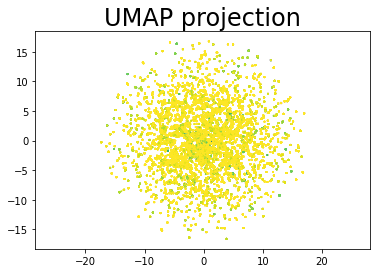

In [9]:
from sklearn.preprocessing import StandardScaler
import umap
import matplotlib.pyplot as plt

reducer = umap.UMAP(n_components=3)
umap_data = tree_df.drop(['magnetization_per_atom'], axis=1).dropna().values
umap_label = tree_df.dropna().magnetization_per_atom
scaled_data = StandardScaler().fit_transform(umap_data)
embedding = reducer.fit_transform(scaled_data)
print(embedding.shape)

plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    s=0.8,
    c=-umap_label
)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection', fontsize=24)